In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/Global Superstore.csv", encoding="ISO-8859-1")
df.head(2)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341   IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   

   Customer Name    Segment           City            State  ...  \
0    Rick Hansen   Consumer  New York City         New York  ...   
1  Justin Ritter  Corporate     Wollongong  New South Wales  ...   

        Product ID    Category Sub-Category  \
0  TEC-AC-10003033  Technology  Accessories   
1  FUR-CH-10003950   Furniture       Chairs   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  

[2 rows x 24 columns]

In [3]:
df.shape

(51290, 24)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.isnull().sum()[:2]

Row ID      0
Order ID    0
dtype: int64

### Read another dataset which contains description of above dataset

In [6]:
des = pd.read_csv("../data/Data Dictionary.csv")
des

Attributes                                       Description
0         Order ID                     Unique ID of the transaction 
1       Order Date                Date on which the order was placed
2        Ship Date               Date on which the shipment was made
3        Ship Mode                   The mode of shipment (category)
4      Customer ID                     The unique ID of the customer
5    Customer Name                              Name of the customer
6          Segment  The market segment to which the customer belongs
7             City                      City of the delivery address
8            State                     State of the delivery address
9          Country                   Country of the delivery address
10     Postal Code               Postal code of the delivery address
11          Market      Market segment to which the customer belongs
12          Region               Geographical region of the customer
13      Product ID                          Unique ID of the product
14        Category                           Category of the product
15    Sub-Category                       Sub-category of the product
16    Product Name                               Name of the product
17           Sales              Total sales value of the transaction
18        Quantity                   Quantity of the product ordered
19        Discount        Discount percentage offered on the product
20          Profit                    Profit made on the transaction
21   Shipping Cost          Shipping cost incured on the transaction
22  Order Priority                    Priority assigned to the order

### Check datatypes of columns

In [7]:
df.dtypes[:5]

Row ID         int64
Order ID      object
Order Date    object
Ship Date     object
Ship Mode     object
dtype: object

In [8]:
df["orderdate"]=pd.to_datetime(df["Order Date"])
df.dtypes

Row ID                     int64
Order ID                  object
Order Date                object
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
orderdate         datetime64[ns]
dtype: object

In [9]:
df.shape

(51290, 25)

In [10]:
df.orderdate[0]

Timestamp('2012-07-31 00:00:00')

In [11]:
df["Order Date"][0]

'31-07-2012'

In [12]:
df["shipdate"]=pd.to_datetime(df["Ship Date"])
# df.dtypes
df[["Order Date","orderdate","Ship Date","shipdate"]].head()

Order Date  orderdate   Ship Date   shipdate
0  31-07-2012 2012-07-31  31-07-2012 2012-07-31
1  05-02-2013 2013-05-02  07-02-2013 2013-07-02
2  17-10-2013 2013-10-17  18-10-2013 2013-10-18
3  28-01-2013 2013-01-28  30-01-2013 2013-01-30
4  05-11-2013 2013-05-11  06-11-2013 2013-06-11

In [13]:
df["Customer Name"].str.upper()[:3]

0      RICK HANSEN
1    JUSTIN RITTER
2     CRAIG REITER
Name: Customer Name, dtype: object

In [41]:
df["year"]=df.orderdate.dt.year
df["month"]=df.orderdate.dt.month

In [42]:
df.iloc[1:5,-5:]

orderdate   shipdate  year   dayname  month
1 2013-05-02 2013-07-02  2013  Thursday      5
2 2013-10-17 2013-10-18  2013  Thursday     10
3 2013-01-28 2013-01-30  2013    Monday      1
4 2013-05-11 2013-06-11  2013  Saturday      5

In [16]:
df.year.unique()
x=df.year.value_counts().index
y = df.year.value_counts()

In [17]:
x

Int64Index([2014, 2013, 2012, 2011], dtype='int64')

In [18]:
import matplotlib.pyplot as plt

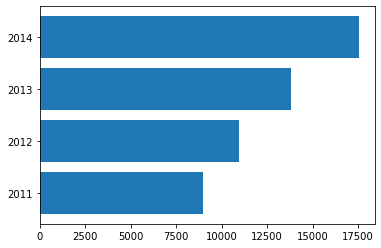

In [19]:
plt.barh(x,y)
plt.yticks(x)
plt.show()

### Fetch weekdays

In [20]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\users\sachtech\anaconda3\lib\site-packages (1.2.3)


In [21]:
df["dayname"]=df.orderdate.dt.day_name()
df.head(2)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341   IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   

   Customer Name    Segment           City            State  ...     Sales  \
0    Rick Hansen   Consumer  New York City         New York  ...  2309.650   
1  Justin Ritter  Corporate     Wollongong  New South Wales  ...  3709.395   

   Quantity Discount    Profit Shipping Cost Order Priority  orderdate  \
0         7      0.0  762.1845        933.57       Critical 2012-07-31   
1         9      0.1 -288.7650        923.63       Critical 2013-05-02   

    shipdate  year   dayname  
0 2012-07-31  2012   Tuesday  
1 2013-07-02  2013  Thursday  

[2 rows x 28 columns]

### Return orders of every month in 2014

In [22]:
x=df[df.year==2014].orderdate.dt.month.value_counts()
x

11    1993
12    1831
9     1694
10    1685
6     1606
8     1569
3     1355
5     1303
4     1267
7     1137
1     1075
2     1016
Name: orderdate, dtype: int64

In [23]:
df[(df.year==2014)&(df.orderdate.dt.month==11)].shape

(1993, 28)

In [24]:
df[(df.year==2014)&(df.orderdate.dt.month==1)].Sales.sum()

268265.5224

In [25]:
months=df[df.year==2014].orderdate.dt.month.value_counts().index.tolist()

In [26]:
UPDATED_DF=[]
for i in months:
    sale=df[(df.year==2014)&(df.orderdate.dt.month==i)].Sales.sum()
    UPDATED_DF.append([i,sale])

<AxesSubplot:xlabel='month'>

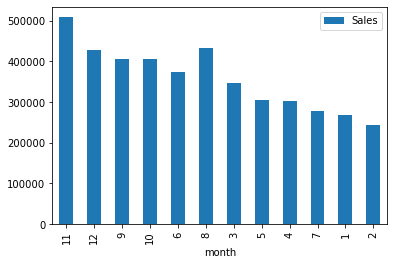

In [27]:
xy=pd.DataFrame(UPDATED_DF,columns=["month","Sales"])
xy.set_index("month").plot(kind="bar")

In [28]:
xy

month         Sales
0      11  508954.73156
1      12  427757.39800
2       9  405436.70584
3      10  406659.41500
4       6  372577.23298
5       8  432731.04194
6       3  347720.96868
7       5  304798.83604
8       4  302132.54000
9       7  278672.17326
10      1  268265.52240
11      2  244159.30486

In [29]:
df[["dayname","Ship Mode","orderdate"]].orderdate.dt.week.value_counts()

<ipython-input-29-c413e253fd0d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[["dayname","Ship Mode","orderdate"]].orderdate.dt.week.value_counts()


47    1562
52    1501
46    1472
39    1471
38    1435
51    1408
48    1373
26    1265
25    1253
50    1245
34    1197
24    1169
37    1155
41    1142
19    1111
32    1109
1     1086
33    1085
35    1080
10    1080
45    1066
15    1052
6     1021
42    1003
43     994
44     983
27     974
23     968
36     908
28     895
22     894
2      887
11     882
49     873
20     826
21     802
14     802
40     797
12     766
16     761
30     732
5      719
17     701
18     693
29     683
13     683
31     680
7      673
9      644
3      593
4      587
8      549
Name: orderdate, dtype: int64

### Number of Microwaves sold in 2014

In [39]:
df[(df.year==2014)&(df["Product Name"].str.contains("microwave",case=False))].Quantity.sum()

281

In [44]:
df[(df.year==2014)&(df["Product Name"].str.contains("microwave",case=False))].month.value_counts()

11    11
6     10
5      9
9      8
10     8
12     8
7      7
4      6
1      4
8      4
3      3
2      2
Name: month, dtype: int64

In [46]:
df[(df.year==2014)&(df["Product Name"].str.contains("microwave",case=False))&(df.month==1)].Quantity.sum()

19

In [50]:
unique_month = df[(df.year==2014)&(df["Product Name"].str.contains("Microwave"))].month.value_counts().index
unique_month.tolist()

[11, 6, 5, 9, 10, 12, 7, 4, 1, 8, 3, 2]

In [53]:
orders_in_2014 = []
for i in unique_month.tolist():
    ordr = df[(df.year==2014)&(df["Product Name"].str.contains("microwave",case=False))&(df.month==i)].Quantity.sum()
    orders_in_2014.append([i,ordr])

In [59]:
updated=pd.DataFrame(orders_in_2014, columns=["Month", "Number of microwave sold"])
updated.set_index("Month", inplace=True)

<AxesSubplot:xlabel='Month'>

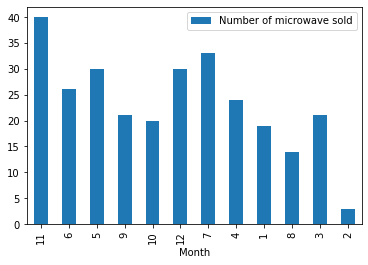

In [60]:
updated.plot(kind="bar")